<a href="https://colab.research.google.com/github/giillbertt/TPCB_Pneumonia/blob/main/TPCB_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, glob  #to import subfolders
import numpy as np #for arrays and metrices
import seaborn as sns #for plotting on visual graph
import matplotlib.pyplot as plt #for plot the graph and display images
import pandas as pd #to import csv dataset and create dataframe
import cv2

from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split #to split the data into train and validation data
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for augment data / preprocess the image
from tensorflow.keras.models import Model #used to create and define neural network models.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #This module contains various layers that can be used to build neural network architectures. Dropout for increasing the accuracy
from tensorflow.keras.callbacks import Callback,EarlyStopping #EarlyStopping is often used to stop training when a monitored metric (e.g., validation loss) stops improving.
from tensorflow.keras.applications import ResNet50 #transfer learning
from tensorflow.keras.applications.resnet50 import preprocess_input #augmentation parameters
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input #to get complete report of the model
from sklearn.metrics import classification_report


IMPORTING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/Covid19-dataset/dataset'

In [ ]:
name_class = os.listdir(path)
name_class #get the list directory from dataset

['train', 'test']

In [ ]:
filepaths = (glob.glob(path + '/**/*.*', recursive=True))  #get all list from all subfolders dataset

In [ ]:
filepaths

['/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/010.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/013.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/015.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/018.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/011.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/014.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/012.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/019.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/016.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/01.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/017.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/04.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/train/Normal/056.jpeg',
 '/content/drive/MyDrive/Covid19-dataset/dataset/trai

In [ ]:
labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], filepaths))
labels #extracting third part from dataset path above or the name of subfolder or the class

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pn

CREATE DATAFRAME

In [ ]:
filepath = pd.Series(filepaths, name = 'Filepath').astype(str)
labels = pd.Series(labels, name = 'Label')
data = pd.concat([filepath,labels], axis = 1)
data = data.sample(frac = 1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/drive/MyDrive/Covid19-dataset/dataset...,Viral Pneumonia
1,/content/drive/MyDrive/Covid19-dataset/dataset...,Viral Pneumonia
2,/content/drive/MyDrive/Covid19-dataset/dataset...,Normal
3,/content/drive/MyDrive/Covid19-dataset/dataset...,Normal
4,/content/drive/MyDrive/Covid19-dataset/dataset...,Normal


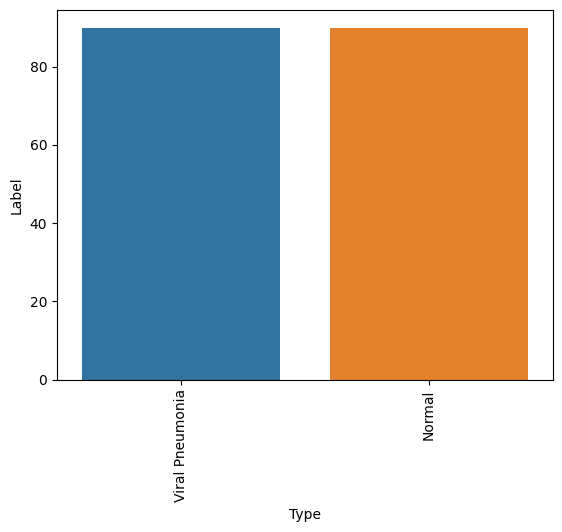

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel ('Type')
plt.xticks (rotation = 90);  #Plot the images that i have for each classes

SPLIT THE DATA

In [ ]:
train, test = train_test_split(data, test_size=0.30, random_state=42) #split the data into train (70) and test (30) and random state to mix up the data

DISPLAY THE IMAGE FROM DATASET

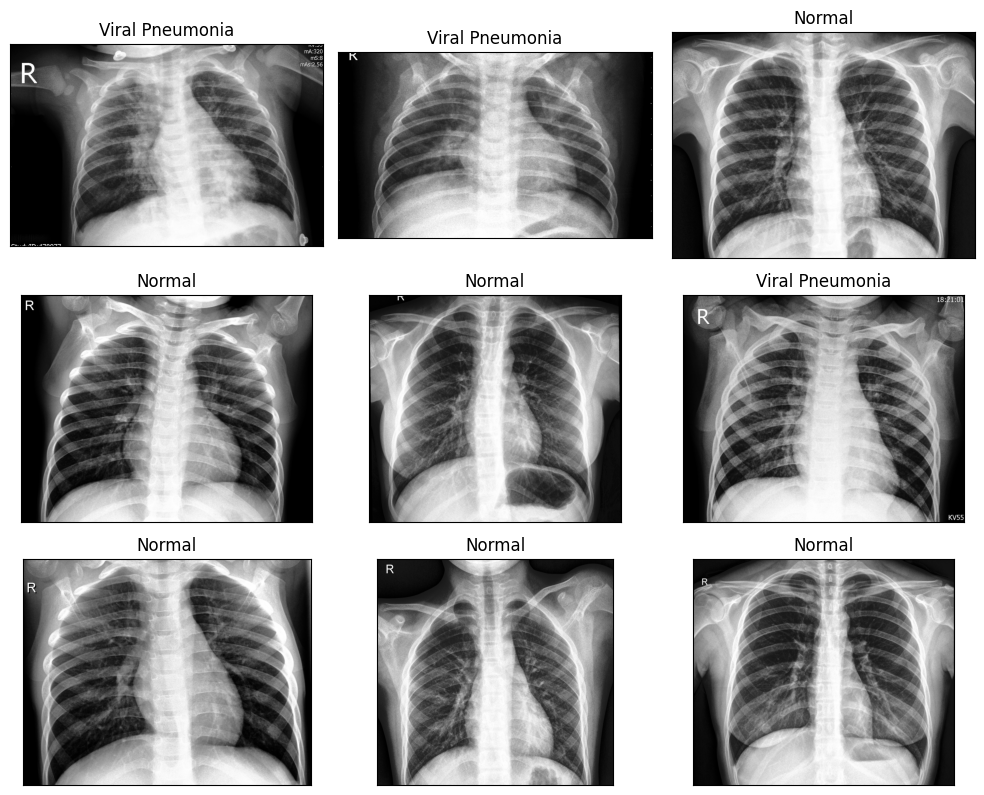

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

Image Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input, validation_split = 0.2) #whatever the data, we should convert it into array or metrices
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #Preprocessing

Converting the images into array after augmented

In [ ]:
train_gen = train_datagen.flow_from_dataframe( #to generate batches of data from a DataFrame
    dataframe = train,
    x_col = 'Filepath', #The name of the column in the DataFrame that contains file paths to the images
    y_col = 'Label',
    target_size = (100,100), #The dimensions to which the images will be resized during preprocessing (100x100 pixels)
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42 ) #A random seed to ensure reproducibility

valid_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (100,100),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False,
    seed = 42 )

test_gen = test_datagen.flow_from_dataframe(
    dataframe = test,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (100,100),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False,
    seed = 42 )


Found 126 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.


Model Pretrain Resnet50 (Transfer Learning from ImageNet)

In [ ]:
pretrained_model = ResNet50(
    input_shape = (100,100,3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'avg')

pretrained_model.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation = 'relu')(pretrained_model.output)
x = Dense(128, activation = 'relu')(x)

outputs = Dense(2, activation = 'softmax')(x)
model = Model(inputs=inputs, outputs = outputs)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics =['accuracy']
)

Early Stopping for optimization

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Covid19-dataset/model/BestModel.h5', monitor='val_accuracy', verbose=1, mode='max', save_best_only=True)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

my_callbacks = [checkpoint, early]

RUN EPOCHS

In [ ]:
history = model.fit(train_gen, validation_data=valid_gen, epochs = 50 ,callbacks=my_callbacks)

Epoch 1/50
4/4 [==============================] - ETA: 0s - loss: 1.0244 - accuracy: 0.5794
Epoch 1: val_accuracy improved from -inf to 0.79630, saving model to /content/drive/MyDrive/Covid19-dataset/model/BestModel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 65s 16s/step - loss: 1.0244 - accuracy: 0.5794 - val_loss: 0.4391 - val_accuracy: 0.7963
Epoch 2/50
4/4 [==============================] - ETA: 0s - loss: 0.2665 - accuracy: 0.8889
Epoch 2: val_accuracy improved from 0.79630 to 0.83333, saving model to /content/drive/MyDrive/Covid19-dataset/model/BestModel.h5
4/4 [==============================] - 12s 3s/step - loss: 0.2665 - accuracy: 0.8889 - val_loss: 0.4101 - val_accuracy: 0.8333
Epoch 3/50
4/4 [==============================] - ETA: 0s - loss: 0.1780 - accuracy: 0.9365
Epoch 3: val_accuracy did not improve from 0.83333
4/4 [==============================] - 13s 3s/step - loss: 0.1780 - accuracy: 0.9365 - val_loss: 0.2593 - val_accuracy: 0.8333
Epoch 4/50
4/4 [==============================] - ETA: 0s - loss: 0.1185 - accuracy: 0.9603
Epoch 4: val_accuracy improved from 0.83333 to 0.88889, saving model to /content/drive/MyDrive/Covid19-dataset/model/BestModel.h5
4/4 [==========================

In [ ]:
model.save("BestModel.h5") #save the Resnet50 model

Evaluate model Resnet50

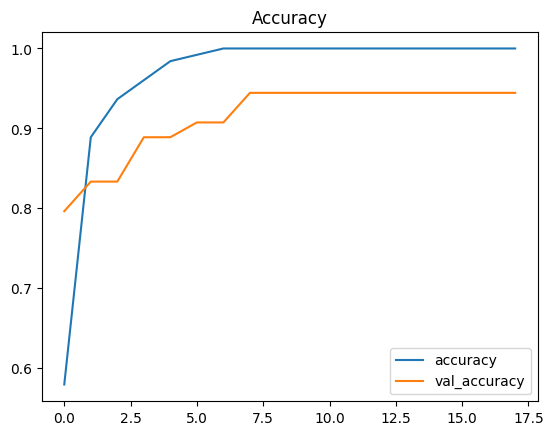

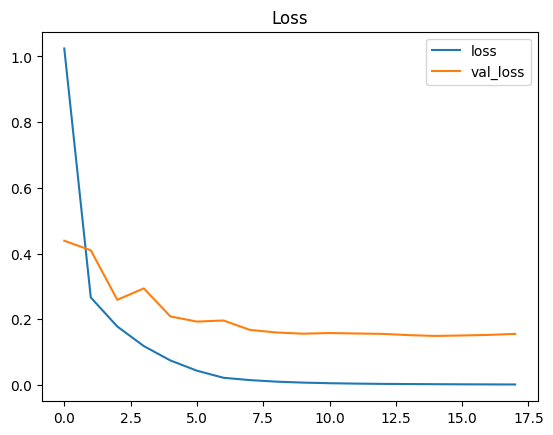

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

Print the result of test loss and test accuracy

In [ ]:
results = model.evaluate(test_gen, verbose=0)
print("Test Loss : {:.5f}".format(results[0]))
print("Test Accuracy : {:.2f}%".format(results[1]*100))

Test Loss : 0.15565
Test Accuracy : 94.44%


 Make predictions on the test dataset using a trained model and then map the predicted numerical labels back to their original class labels.

In [ ]:
#Predict the label of test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

#Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

2/2 [==============================] - 4s 709ms/step


Print the classification report

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

         Normal       0.92      0.96      0.94        23
Viral Pneumonia       0.97      0.94      0.95        31

       accuracy                           0.94        54
      macro avg       0.94      0.95      0.94        54
   weighted avg       0.95      0.94      0.94        54



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

[Text(45.72222222222221, 0.5, 'True_labels')]

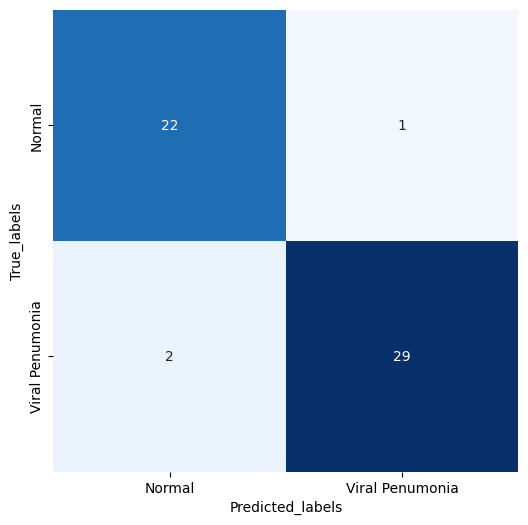

In [ ]:
plt.figure(figsize=(6, 6))
hm = sns.heatmap(confusion_matrix(y_test,pred), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False, xticklabels=['Normal','Viral Penumonia'],yticklabels=['Normal','Viral Penumonia'])
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels')

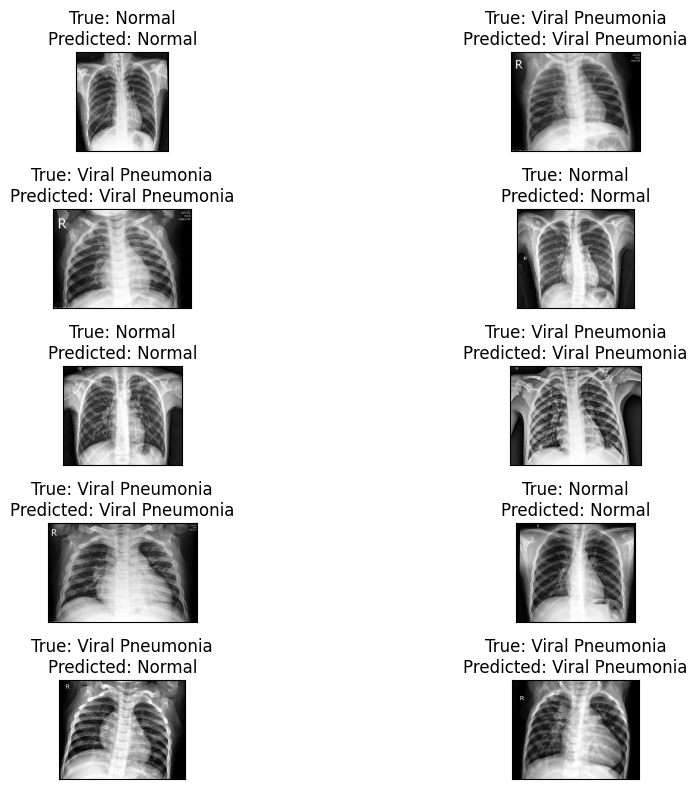

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols=2, figsize=(12,8), subplot_kw={'xticks':[], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

 An example of using a trained deep learning model to make predictions on a single image

In [ ]:
img_path = '/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia/096.jpeg'

img = cv2.imread(img_path)
img = cv2.resize(img, (100,100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

1/1 [==============================] - 1s 1s/step
[[  0 100]]
